# # Introduction
In this notebook, we will perform exploratory data analysis (EDA) and data visualization on the Student Test Scores dataset. The dataset contains information about students' demographic backgrounds and test scores.

**The objectives of this notebook are:**

* To explore the relationships between different variables in the dataset
* To identify trends and patterns in the data
* To visualize the data using various plotting techniques
* To gain insights that can help us build predictive models for student test scores
* Let's start by importing the necessary libraries and loading the dataset.

## Import Libraries and Load Dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# load the dataset
data = pd.read_csv('../data/Expanded_data_with_more_features.csv')

# display the first 5 rows of the dataset
data.head()

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [2]:
data.columns

Index(['Unnamed: 0', 'Gender', 'EthnicGroup', 'ParentEduc', 'LunchType',
       'TestPrep', 'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild',
       'NrSiblings', 'TransportMeans', 'WklyStudyHours', 'MathScore',
       'ReadingScore', 'WritingScore'],
      dtype='object')

Data dictionary
The following are the column descriptions. Columns 0 to 5 and 11 to 13 are common to both files. The rest are present to the extended file only.

1. Gender: gender of the student (male/female)
1. EthnicGroup: ethnic group of the student (group A to E)
1. ParentEduc: parent(s) education background
1. LunchType: school luch type (standard or free/reduced)
1. TestPrep: test preparation course (completed or none)
1. ParentMaritalStatus: parent(s) marital status
1. PracticeSport: how often the student parctice sport
1. IsFirstChild: if the child is first child in the family or not
1. NrSiblings : Number of siblings the student has
1. TransportMeans: Means of transport to school
1. WklyStudyHours: Weekly self-study hours
1. MathScore: math test score
1. ReadingScore: reading test score
1. WritingScore writing test score

The column **Unnamed: 0** seems to be an extra index column.

In [3]:
data = data.drop('Unnamed: 0', axis=1)

In [4]:
data.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

In [5]:
data.dtypes

Gender                  object
EthnicGroup             object
ParentEduc              object
LunchType               object
TestPrep                object
ParentMaritalStatus     object
PracticeSport           object
IsFirstChild            object
NrSiblings             float64
TransportMeans          object
WklyStudyHours          object
MathScore                int64
ReadingScore             int64
WritingScore             int64
dtype: object

From the **data.dtypes** output, we can see that some columns have an incorrect data type. Specifically, **NrSiblings** should have a data type of int instead of float, and **WklyStudyHours** should also have a numeric data type instead of an object.

In [6]:
data['NrSiblings'] = data['NrSiblings'].fillna(0).astype(int)
data['WklyStudyHours'] = pd.to_numeric(data['WklyStudyHours'], errors='coerce')

In [7]:
data.dtypes

Gender                  object
EthnicGroup             object
ParentEduc              object
LunchType               object
TestPrep                object
ParentMaritalStatus     object
PracticeSport           object
IsFirstChild            object
NrSiblings               int64
TransportMeans          object
WklyStudyHours         float64
MathScore                int64
ReadingScore             int64
WritingScore             int64
dtype: object

## Exploratory Data Analysis (EDA)

**Data Summary**

* Let's start by getting a summary of the data using the **describe()** function.
* This will give us a summary of the numerical columns in the dataset, including the count, mean, standard deviation, minimum, and maximum values.

In [8]:
data.describe()

,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore
count,30641.000000,0.0,30641.000000,30641.000000,30641.000000
mean,2.035802,NaN,66.558402,69.377533,68.418622
std,1.497166,NaN,15.361616,14.758952,15.443525
min,0.000000,NaN,0.000000,10.000000,4.000000
25%,1.000000,NaN,56.000000,59.000000,58.000000
50%,2.000000,NaN,67.000000,70.000000,69.000000
75%,3.000000,NaN,78.000000,80.000000,79.000000
max,7.000000,NaN,100.000000,100.000000,100.000000


**Insights from this:**

* The dataset has 30,641 observations.
* The average number of siblings (NrSiblings) is around 2.
* The dataset has missing values in the WklyStudyHours column.
* The average math score (MathScore) is around 67, while the average reading score (ReadingScore) and writing score (WritingScore) are around 69 and 68, respectively.
* The standard deviation for the math, reading, and writing scores are similar (around 15), which indicates that the scores have similar variability.
* The minimum math score is 0, while the minimum reading score is 10 and the minimum writing score is 4, which suggests that some students scored very low on these tests.
* The 25th percentile for the math, reading, and writing scores are around 56-59, which indicates that 25% of the students scored below this level.
* The 50th percentile (median) for the math, reading, and writing scores are around 67-70, which indicates that 50% of the students scored below this level.
* The 75th percentile for the math, reading, and writing scores are around 78-80, which indicates that 25% of the students scored above this level.
* The maximum math score is 100, while the maximum reading and writing scores are also 100, which suggests that some students scored very high on these tests.

## **Data Visualization**

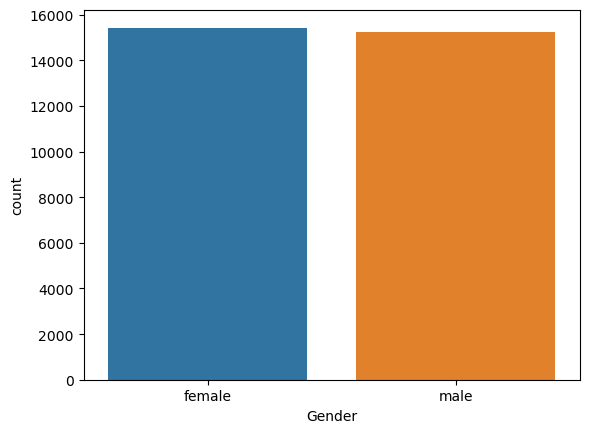

In [9]:
# plot the distribution of the gender variable
sns.countplot(x='Gender', data=data)
plt.show()

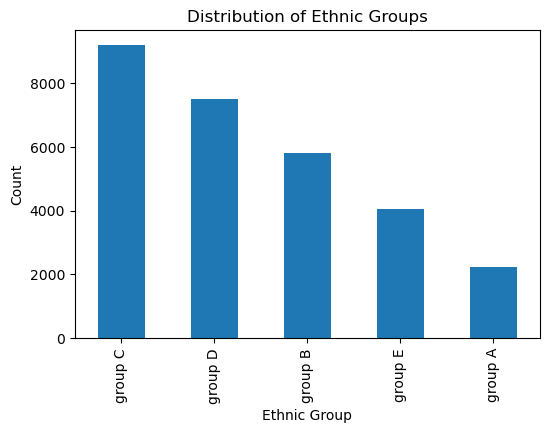

In [10]:
# Bar chart of EthnicGroup column
plt.figure(figsize=(6,4))
data['EthnicGroup'].value_counts().plot(kind='bar')
plt.xlabel('Ethnic Group')
plt.ylabel('Count')
plt.title('Distribution of Ethnic Groups')
plt.show()

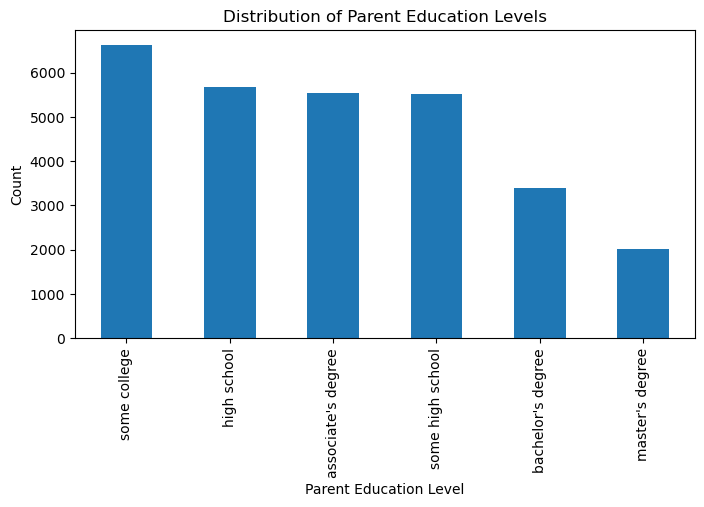

In [11]:
# Bar chart of ParentEduc column
plt.figure(figsize=(8,4))
data['ParentEduc'].value_counts().plot(kind='bar')
plt.xlabel('Parent Education Level')
plt.ylabel('Count')
plt.title('Distribution of Parent Education Levels')
plt.show()

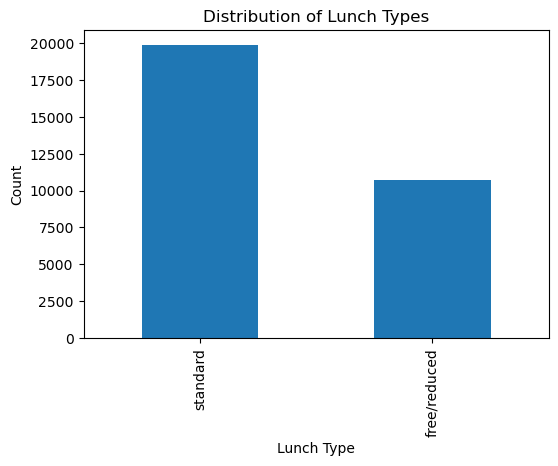

In [12]:
# Bar chart of LunchType column
plt.figure(figsize=(6,4))
data['LunchType'].value_counts().plot(kind='bar')
plt.xlabel('Lunch Type')
plt.ylabel('Count')
plt.title('Distribution of Lunch Types')
plt.show()

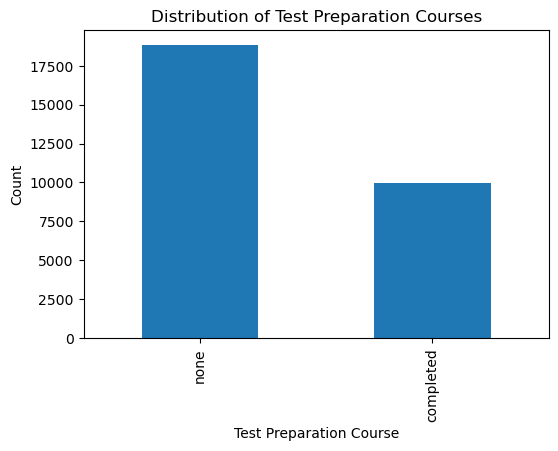

In [13]:
# Bar chart of TestPrep column
plt.figure(figsize=(6,4))
data['TestPrep'].value_counts().plot(kind='bar')
plt.xlabel('Test Preparation Course')
plt.ylabel('Count')
plt.title('Distribution of Test Preparation Courses')
plt.show()

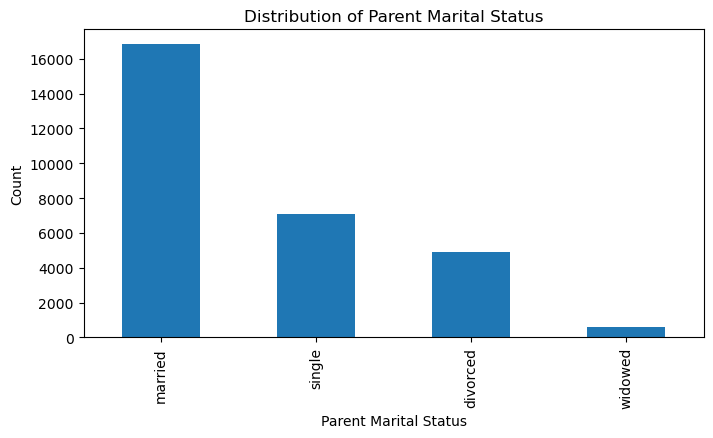

In [14]:
# Bar chart of ParentMaritalStatus column
plt.figure(figsize=(8,4))
data['ParentMaritalStatus'].value_counts().plot(kind='bar')
plt.xlabel('Parent Marital Status')
plt.ylabel('Count')
plt.title('Distribution of Parent Marital Status')
plt.show()

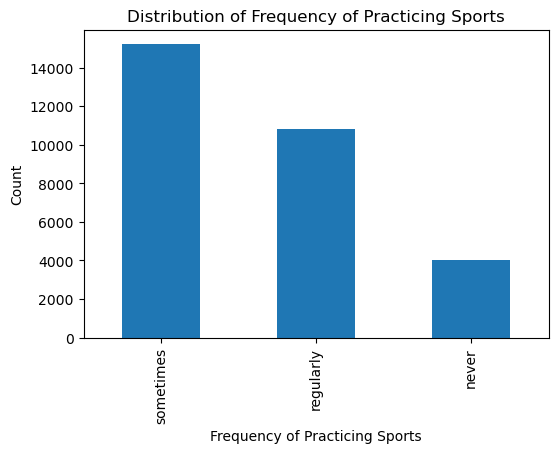

In [15]:
# Bar chart of PracticeSport column

plt.figure(figsize=(6,4))
data['PracticeSport'].value_counts().plot(kind='bar')
plt.xlabel('Frequency of Practicing Sports')
plt.ylabel('Count')
plt.title('Distribution of Frequency of Practicing Sports')
plt.show()

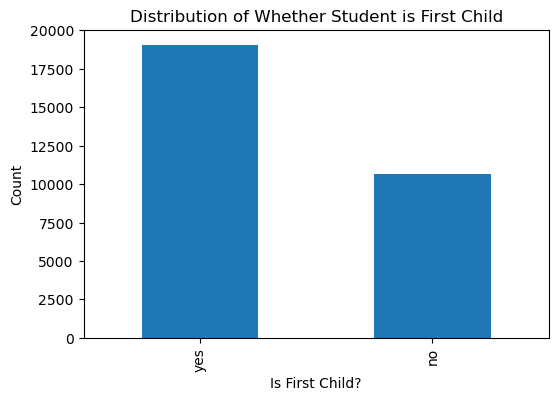

In [16]:
# Bar chart of IsFirstChild column
plt.figure(figsize=(6,4))
data['IsFirstChild'].value_counts().plot(kind='bar')
plt.xlabel('Is First Child?')
plt.ylabel('Count')
plt.title('Distribution of Whether Student is First Child')
plt.show()

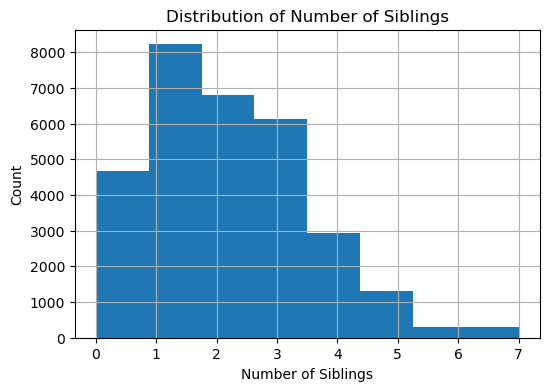

In [17]:
# Histogram of NrSiblings column
plt.figure(figsize=(6,4))
data['NrSiblings'].hist(bins=8)
plt.xlabel('Number of Siblings')
plt.ylabel('Count')
plt.title('Distribution of Number of Siblings')
plt.show()

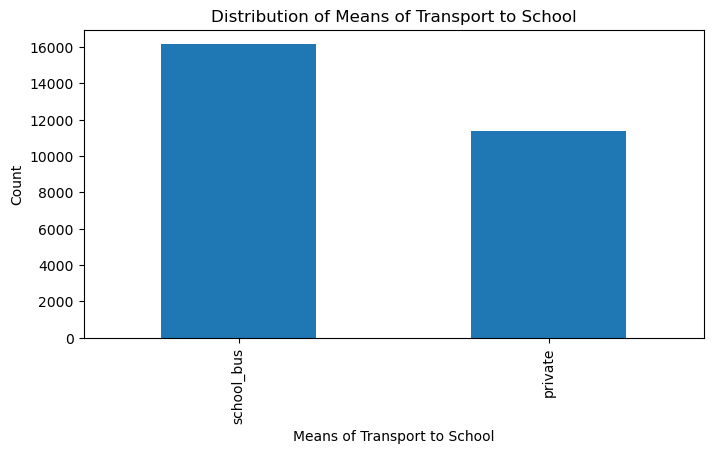

In [18]:
# Bar chart of TransportMeans column
plt.figure(figsize=(8,4))
data['TransportMeans'].value_counts().plot(kind='bar')
plt.xlabel('Means of Transport to School')
plt.ylabel('Count')
plt.title('Distribution of Means of Transport to School')
plt.show()

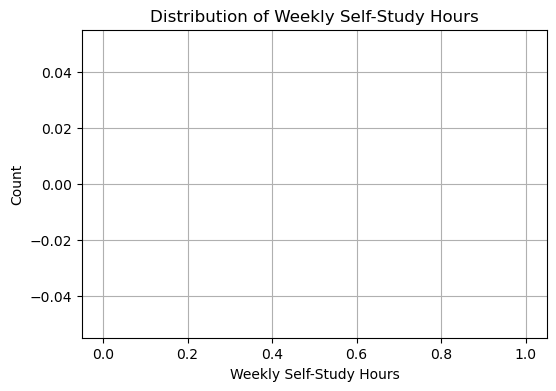

In [19]:
# Histogram of WklyStudyHours column
plt.figure(figsize=(6,4))
data['WklyStudyHours'].hist(bins=20)
plt.xlabel('Weekly Self-Study Hours')
plt.ylabel('Count')
plt.title('Distribution of Weekly Self-Study Hours')
plt.show()

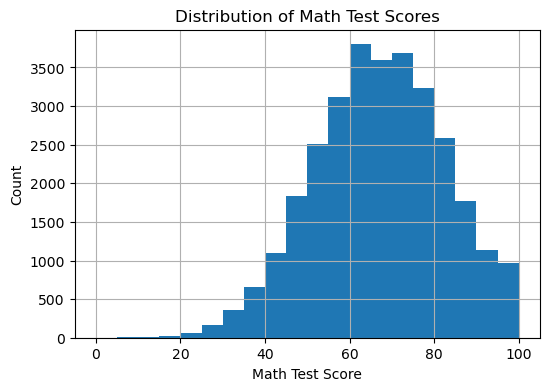

In [20]:
# Histogram of MathScore column
plt.figure(figsize=(6,4))
data['MathScore'].hist(bins=20)
plt.xlabel('Math Test Score')
plt.ylabel('Count')
plt.title('Distribution of Math Test Scores')
plt.show()

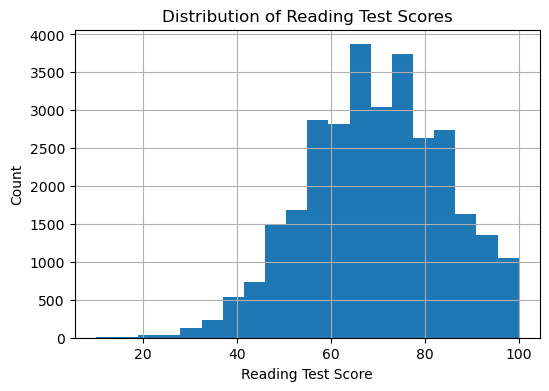

In [21]:
# Histogram of ReadingScore column
plt.figure(figsize=(6,4))
data['ReadingScore'].hist(bins=20)
plt.xlabel('Reading Test Score')
plt.ylabel('Count')
plt.title('Distribution of Reading Test Scores')
plt.show()

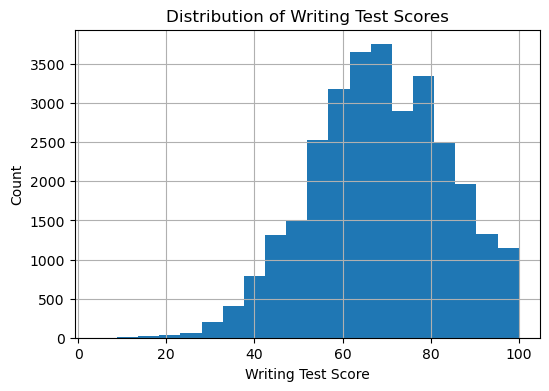

In [22]:
# Histogram of WritingScore column
plt.figure(figsize=(6,4))
data['WritingScore'].hist(bins=20)
plt.xlabel('Writing Test Score')
plt.ylabel('Count')
plt.title('Distribution of Writing Test Scores')
plt.show()

In [23]:
data.columns

Index(['Gender', 'EthnicGroup', 'ParentEduc', 'LunchType', 'TestPrep',
       'ParentMaritalStatus', 'PracticeSport', 'IsFirstChild', 'NrSiblings',
       'TransportMeans', 'WklyStudyHours', 'MathScore', 'ReadingScore',
       'WritingScore'],
      dtype='object')

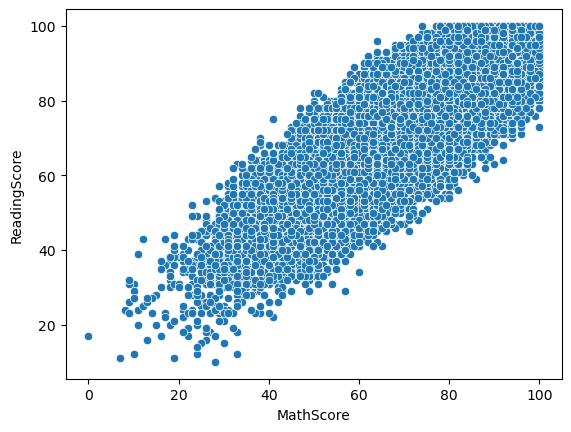

In [24]:
# plot the relationship between math score and reading score
sns.scatterplot(x='MathScore', y='ReadingScore', data=data)
plt.show()


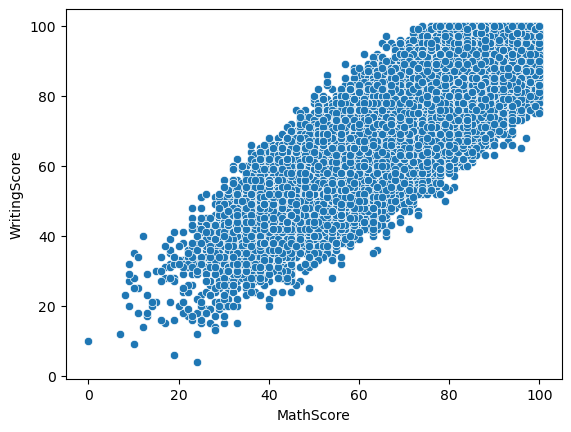

In [25]:
# plot the relationship between math score and writing score
sns.scatterplot(x='MathScore', y='WritingScore', data=data)
plt.show()

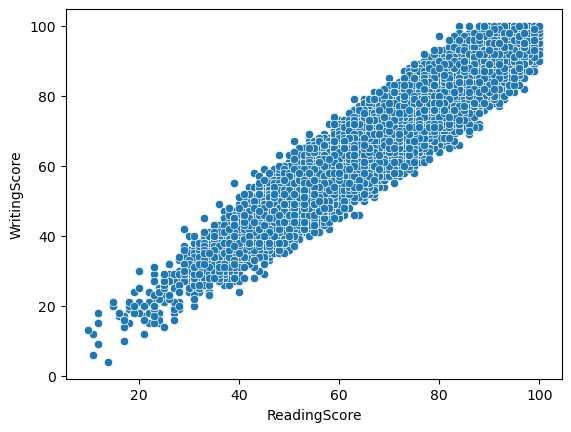

In [26]:
# plot the relationship between reading score and writing score
sns.scatterplot(x='ReadingScore', y='WritingScore', data=data)
plt.show()

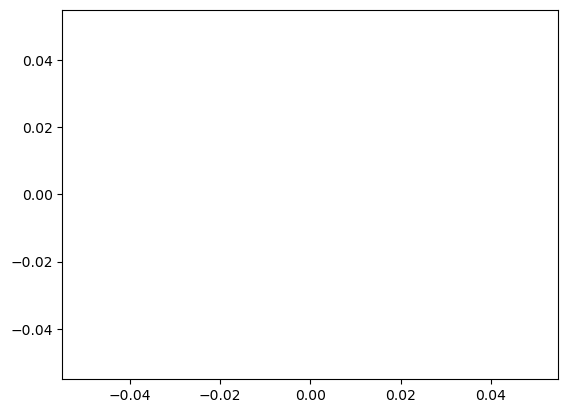

In [27]:
# plot the distribution of weekly study hours
sns.histplot(x='WklyStudyHours', data=data)
plt.show()

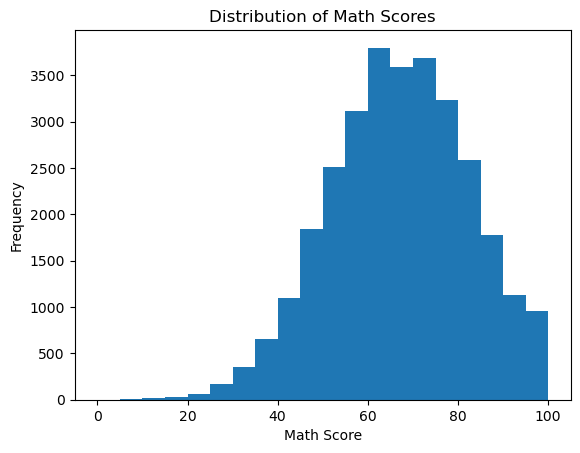

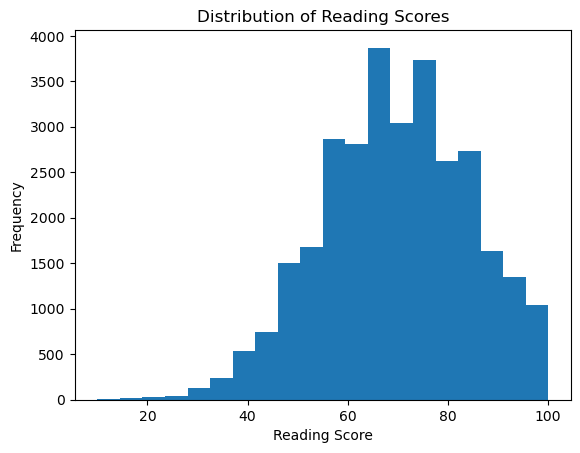

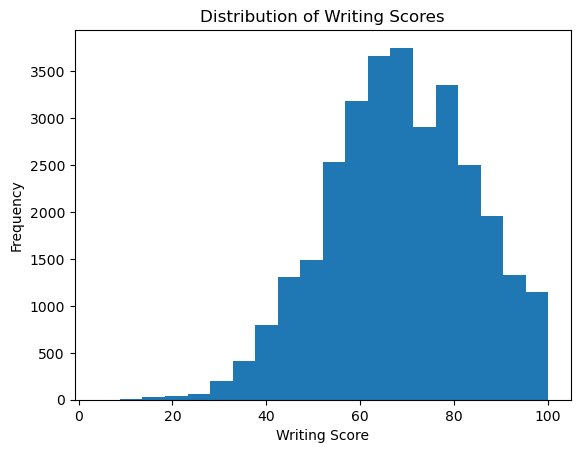

In [28]:
import matplotlib.pyplot as plt

plt.hist(data['MathScore'], bins=20)
plt.title('Distribution of Math Scores')
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.show()

plt.hist(data['ReadingScore'], bins=20)
plt.title('Distribution of Reading Scores')
plt.xlabel('Reading Score')
plt.ylabel('Frequency')
plt.show()

plt.hist(data['WritingScore'], bins=20)
plt.title('Distribution of Writing Scores')
plt.xlabel('Writing Score')
plt.ylabel('Frequency')
plt.show()

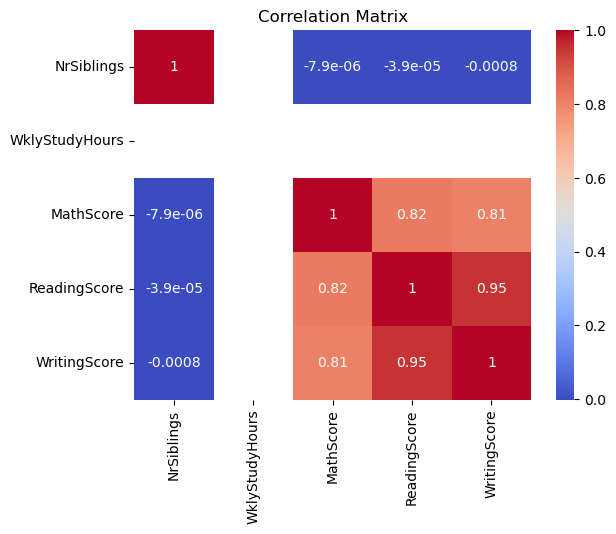

In [29]:
import seaborn as sns

corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [30]:
corr

,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore
NrSiblings,1.000000,NaN,-0.000008,-0.000039,-0.000799
WklyStudyHours,NaN,NaN,NaN,NaN,NaN
MathScore,-0.000008,NaN,1.000000,0.817825,0.807118
ReadingScore,-0.000039,NaN,0.817825,1.000000,0.952584
WritingScore,-0.000799,NaN,0.807118,0.952584,1.000000


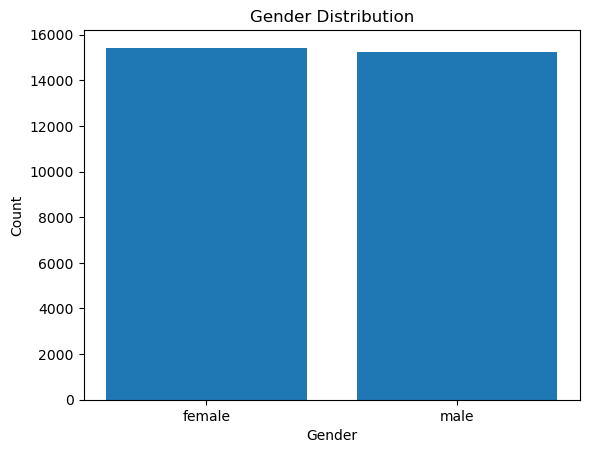

In [31]:
gender_counts = data['Gender'].value_counts()
plt.bar(gender_counts.index, gender_counts.values)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [32]:
gender_counts

female    15424
male      15217
Name: Gender, dtype: int64

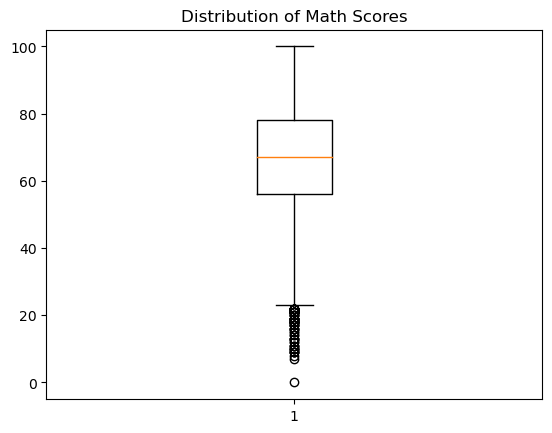

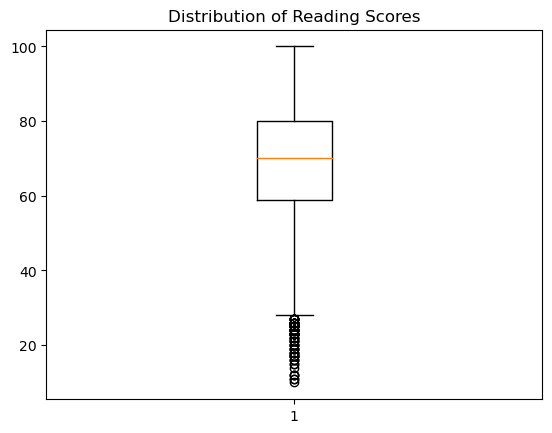

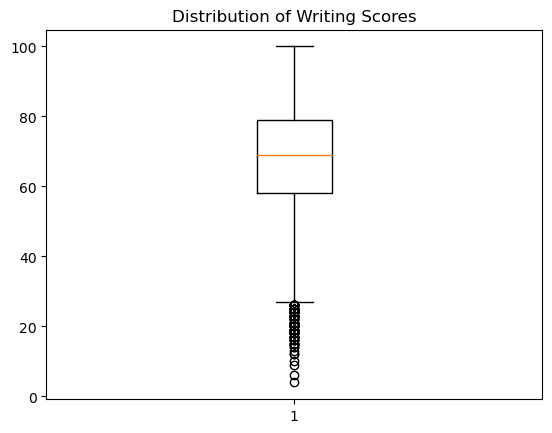

In [33]:
# create a boxplot for math score
plt.boxplot(data['MathScore'])
plt.title('Distribution of Math Scores')
plt.show()

# create a boxplot for reading score
plt.boxplot(data['ReadingScore'])
plt.title('Distribution of Reading Scores')
plt.show()

# create a boxplot for writing score
plt.boxplot(data['WritingScore'])
plt.title('Distribution of Writing Scores')
plt.show()

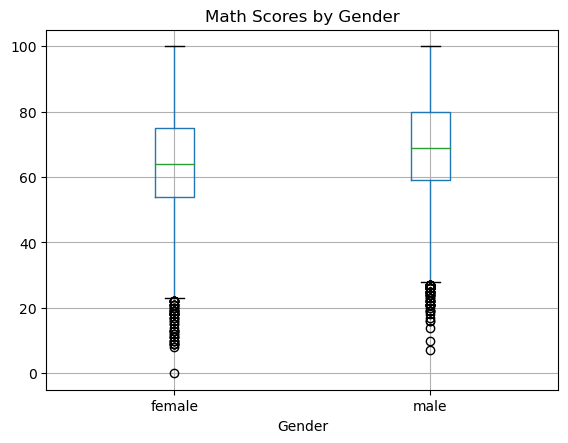

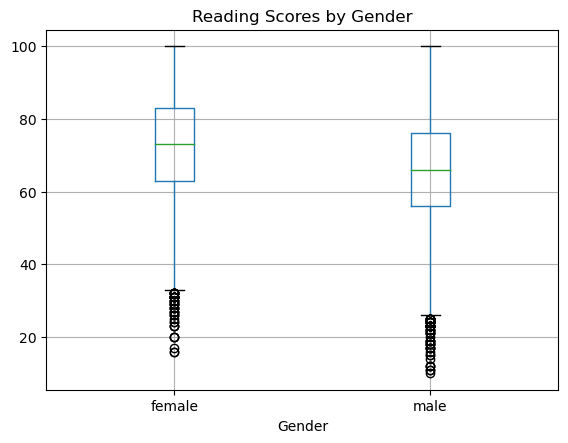

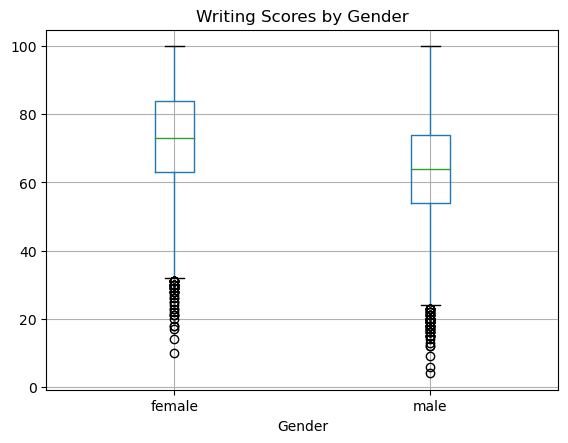

In [34]:
# create box plots for math score by gender
data.boxplot(column='MathScore', by='Gender')
plt.title('Math Scores by Gender')
plt.suptitle('')
plt.show()

# create box plots for reading score by gender
data.boxplot(column='ReadingScore', by='Gender')
plt.title('Reading Scores by Gender')
plt.suptitle('')
plt.show()

# create box plots for writing score by gender
data.boxplot(column='WritingScore', by='Gender')
plt.title('Writing Scores by Gender')
plt.suptitle('')
plt.show()